In [128]:
from pandas_datareader import data as pdr
import yfinance as yf
yf.pdr_override()
import pandas as pd
import datetime
import talib

# Data visualization
import matplotlib.pyplot as plt
import seaborn as sns

#Warning ignore
import warnings
warnings.filterwarnings('ignore')

In [167]:
# Get data
msft =yf.download('MSFT', start='2020-01-01', end='2023-10-08')
msft.reset_index(inplace=True)
msft.set_index('Date', inplace=True)
msft.drop('Close', axis=1,  inplace=True)
msft.rename(columns={'Adj Close': 'Close'},inplace=True)

# Se define el dataframe para los datos del modelo de reinforcment learning 
data_model = pd.DataFrame(data=msft.reset_index()['Date'], columns=['Date'])
data_model.set_index('Date', inplace=True)

[*********************100%%**********************]  1 of 1 completed


In [61]:
function_groups = ['Overlap Studies',
                   'Momentum Indicators',
                   'Volume Indicators',
                   'Volatility Indicators',
                   'Price Transform',
                   'Cycle Indicators',
                   'Pattern Recognition',
                   'Statistic Functions',
                   'Math Transform',
                   'Math Operators']

In [62]:
talib_grps = talib.get_function_groups()

## INDICADORES

Simple moving avergae

In [131]:
sma = msft.loc[:, ['Close']]

In [132]:
for t in [5, 21, 63]:
    sma[f'SMA_{t}'] = talib.SMA(sma.Close,
                               timeperiod=t)

Text(0.5, 0, '')

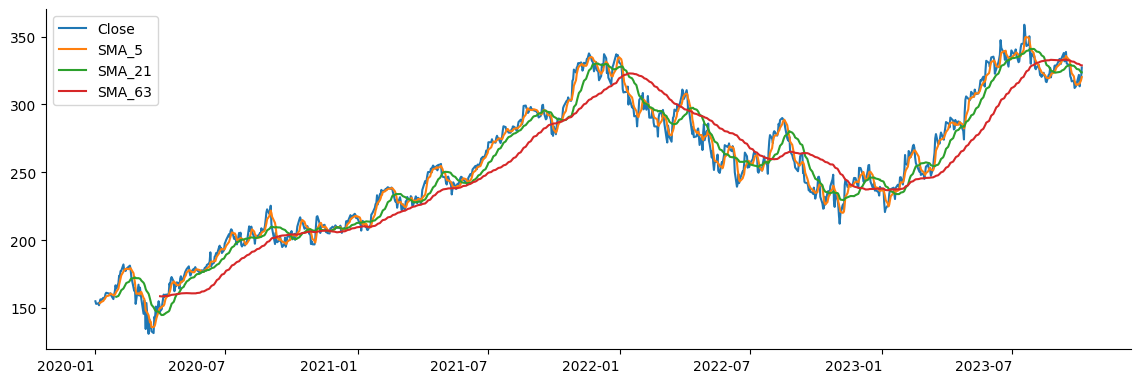

In [133]:
ax = sma.plot(figsize=(14, 5), rot=0)
sns.despine()
ax.set_xlabel('')

Exponential Moving Average (EMA)

In [134]:
ema = msft.loc[:, ['Close']]

In [135]:
for t in [5, 21, 63]:
    ema[f'EMA_{t}'] = talib.EMA(ema.Close,
                               timeperiod=t)

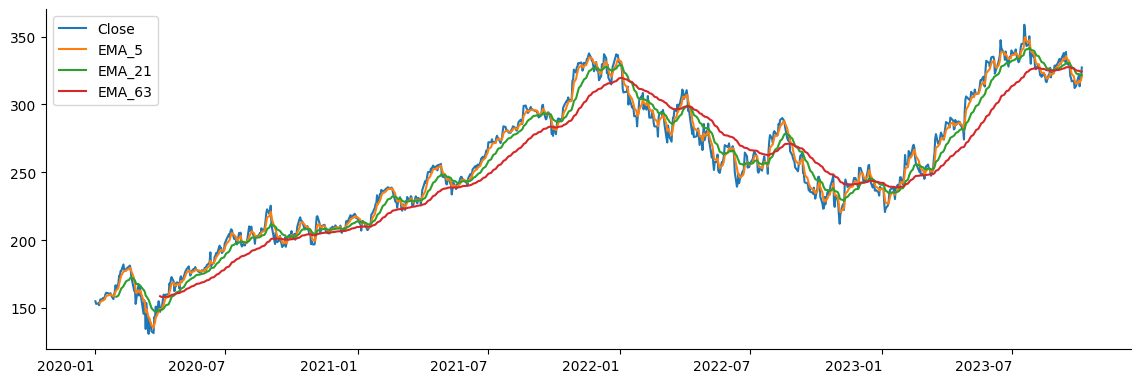

In [136]:
ax = ema.plot(figsize=(14, 5), rot=0)
sns.despine()
ax.set_xlabel('');

Weighted Moving Average (WMA)

In [137]:
wma = msft.loc[:, ['Close']]

In [138]:
for t in [5, 21, 63]:
    wma[f'WMA_{t}'] = talib.WMA(wma.Close,
                               timeperiod=t)

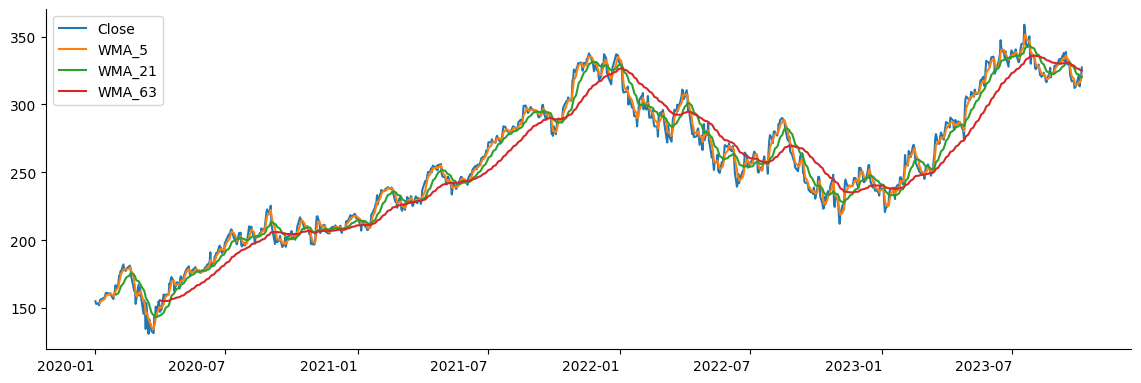

In [139]:
ax = wma.plot(figsize=(14, 5), rot=0)
sns.despine()
ax.set_xlabel('');

## Overlap Studies

Boolinger Bands

In [72]:
s = talib.BBANDS(msft.Close,   # Number of periods (2 to 100000)
                 timeperiod=20,
                 nbdevup=2,    # Deviation multiplier for lower band
                 nbdevdn=2,    # Deviation multiplier for upper band
                 matype=1      # default: SMA
                 )

In [73]:
bb_bands = ['upper', 'middle', 'lower']

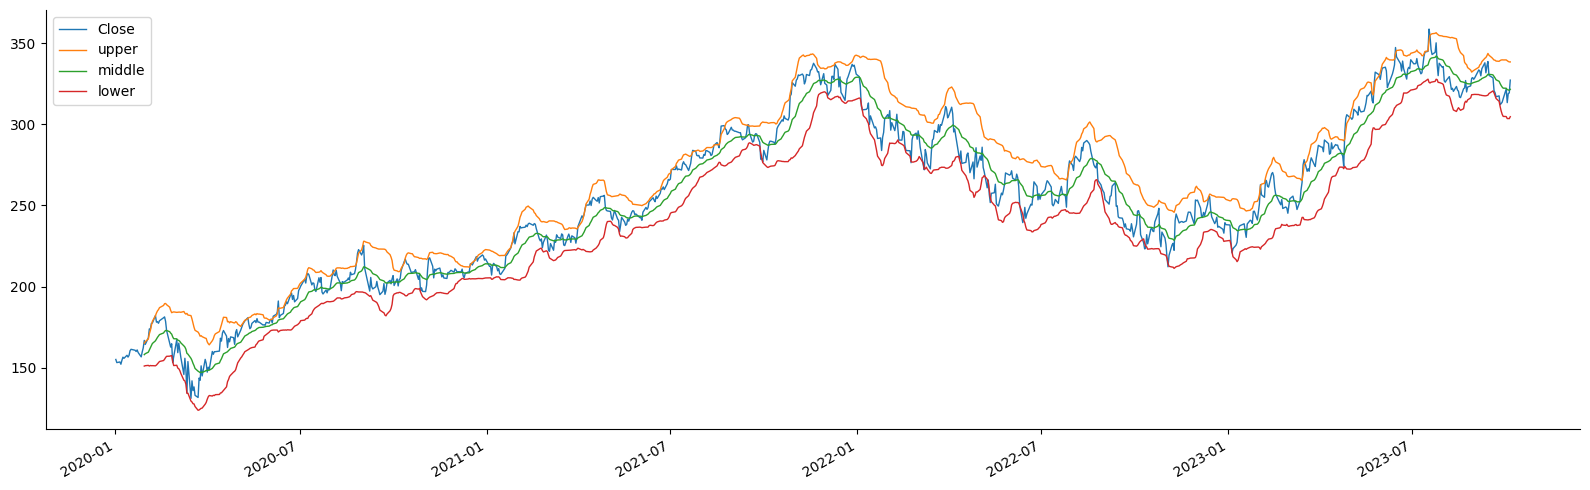

In [150]:
df = msft.loc[:, ['Close']]
df = df.assign(**dict(zip(bb_bands, s)))
ax = df.loc[:, ['Close'] + bb_bands].plot(figsize=(16, 5), lw=1)

ax.set_xlabel('')
sns.despine()
plt.tight_layout();

Parabolic SAR

In [153]:
sar = msft.loc[:,['Close', 'High', 'Low']]
sar['SAR'] = talib.SAR(sar.High, sar.Low, 
                      acceleration=0.02, # common value
                      maximum=0.2)  

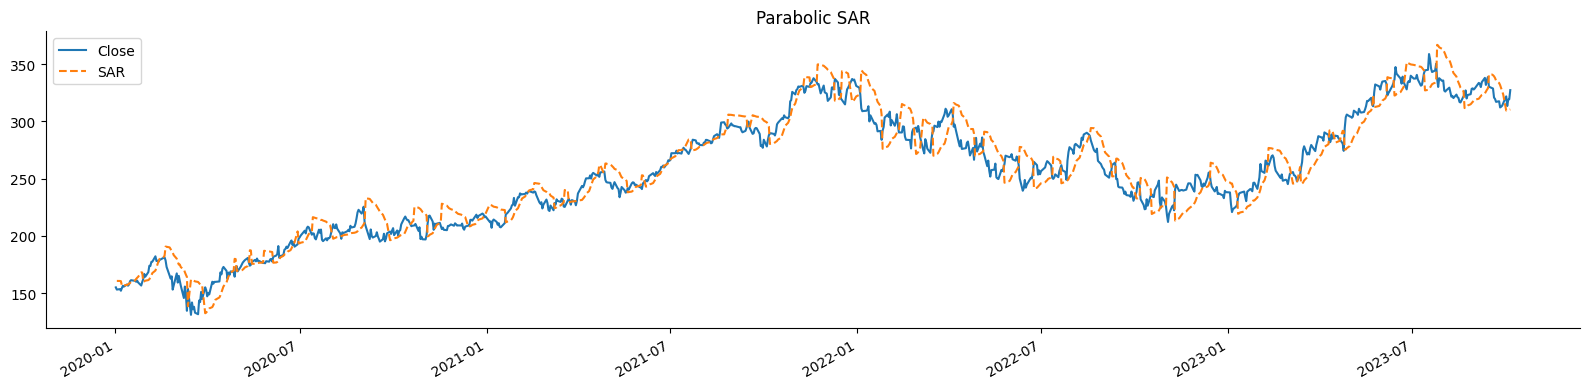

In [154]:
ax = sar[['Close', 'SAR']].plot(figsize=(16, 4), style=['-', '--'], title='Parabolic SAR')
ax.set_xlabel('')
sns.despine()
plt.tight_layout();

## Momentum Indicators
### Plus/Minus Directional Movement 

In [156]:
pm = msft.loc[:,['Close', 'High', 'Low']]

In [157]:
pm['PLUS_DM'] = talib.PLUS_DM(pm.High, pm.Low, timeperiod=10)
pm['MINUS_DM'] = talib.MINUS_DM(pm.High, pm.Low, timeperiod=10)

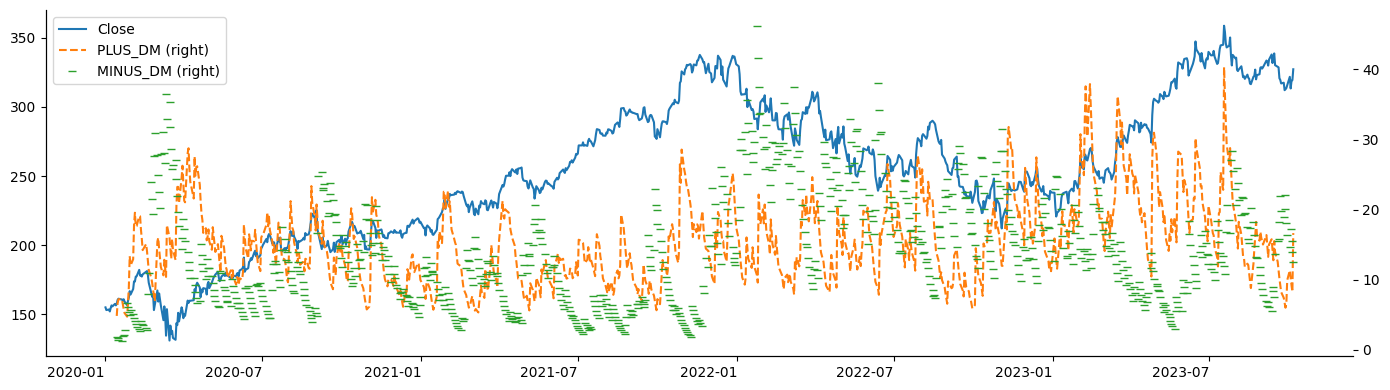

In [158]:
ax = pm[['Close', 'PLUS_DM', 'MINUS_DM']].plot(figsize=(14, 4),
                                               secondary_y=[
                                                   'PLUS_DM', 'MINUS_DM'],
                                               style=['-', '--', '_'],
                                              rot=0)
ax.set_xlabel('')
sns.despine()
plt.tight_layout()

Plus/Minus Directional Index (PLUS_DI/MINUS_DI)

In [160]:
pmi = msft.loc[:,['High', 'Low', 'Close']]

In [161]:
pmi['PLUS_DI'] = talib.PLUS_DI(pmi.High, pmi.Low, pmi.Close, timeperiod=14)
pmi['MINUS_DI'] = talib.MINUS_DI(pmi.High, pmi.Low, pmi.Close, timeperiod=14)

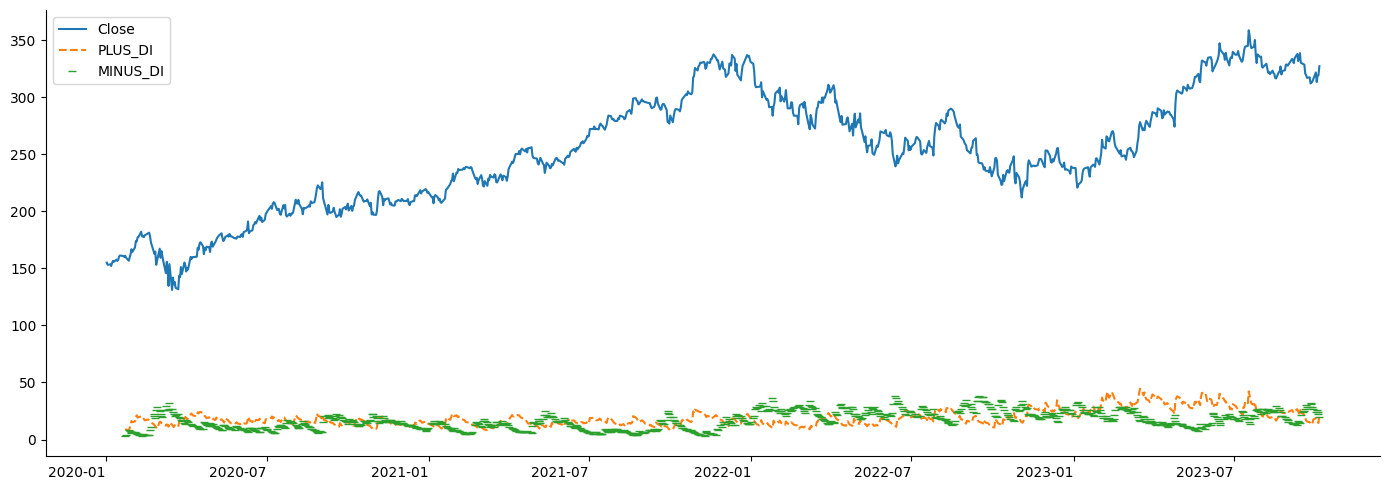

In [162]:
ax = pmi[['Close', 'PLUS_DI', 'MINUS_DI']].plot(figsize=(14, 5), style=['-', '--', '_'], rot=0)

ax.set_xlabel('')
sns.despine()
plt.tight_layout();

In [168]:
data_model[['SMA_5', 'SMA_21', 'SMA_63']] = sma[['SMA_5', 'SMA_21', 'SMA_63']]
data_model[['EMA_5', 'EMA_21', 'EMA_63']] = ema[['EMA_5', 'EMA_21', 'EMA_63']]
data_model[['WMA_5', 'WMA_21', 'WMA_63']] = wma[['WMA_5', 'WMA_21', 'WMA_63']]
data_model['middle'] = df['middle']
data_model['SAR'] = sar['SAR']
data_model[['PLUS_DM', 'MINUS_DM']] = pm[['PLUS_DM', 'MINUS_DM']]
data_model[['PLUS_DI', 'MINUS_DI']] = pmi[['PLUS_DI', 'MINUS_DI']]
data_model

,SMA_5,SMA_21,SMA_63,EMA_5,EMA_21,EMA_63,WMA_5,WMA_21,WMA_63,middle,SAR,PLUS_DM,MINUS_DM,PLUS_DI,MINUS_DI
Date,,,,,,,,,,,,,,,
2020-01-02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-01-03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,160.729996,NaN,NaN,NaN,NaN
2020-01-06,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,160.676596,NaN,NaN,NaN,NaN
2020-01-07,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,160.509932,NaN,NaN,NaN,NaN
2020-01-08,153.710934,NaN,NaN,153.710934,NaN,NaN,153.575754,NaN,NaN,NaN,156.509995,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-10-02,315.224005,325.840001,329.847753,317.576197,322.475529,324.843125,316.709334,322.015759,326.227657,322.255751,309.450012,11.348255,14.697057,18.847338,24.470565
2023-10-03,315.474005,325.112858,329.466078,316.180803,321.649573,324.485215,316.098004,320.883943,325.713353,321.411395,309.698812,10.213430,17.197352,16.622616,26.007157
2023-10-04,316.708002,324.418097,329.123395,317.107199,321.405066,324.312552,317.260000,320.324591,325.385037,321.177928,309.942636,9.192087,15.477617,15.393813,24.084616


Average Directional Movement Index Rating

In [83]:
adm = msft.loc[:, ['High', 'Low', 'Close']]

In [84]:
adm['ADX'] = talib.ADX(msft.High, 
                      msft.Low, 
                      msft.Close, 
                      timeperiod=14)

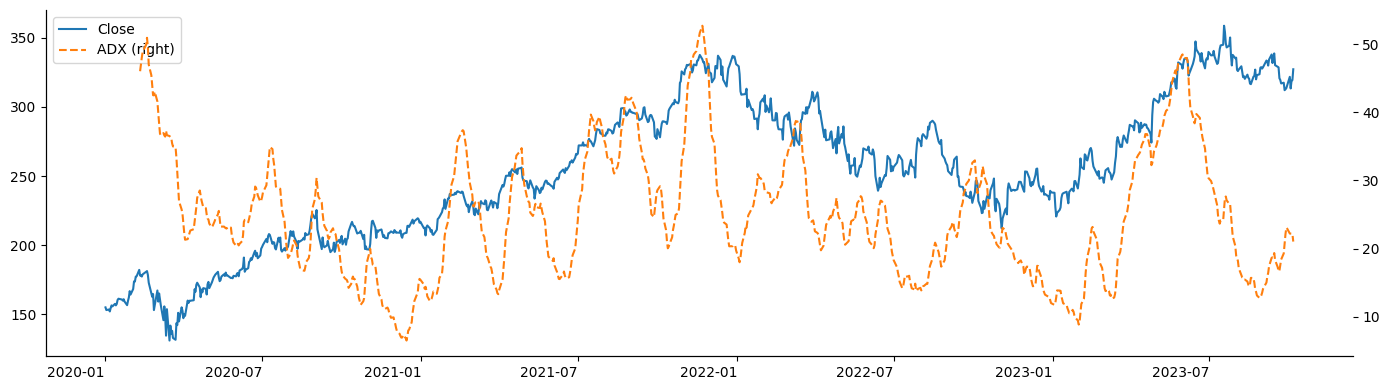

In [85]:
ax = adm[['Close', 'ADX']].plot(figsize=(14, 4), secondary_y='ADX', style=['-', '--'], rot=0)
ax.set_xlabel('')
sns.despine()
plt.tight_layout();

## Volume Indicators
### Chaikin A/D Line

In [86]:
cha = msft.loc['2022-01-02':'2023-01-03',['High', 'Low', 'Close',  'Volume']]

In [87]:
cha['AD'] = talib.AD(cha.High,
                    cha.Low,
                    cha.Close,
                    cha.Volume)

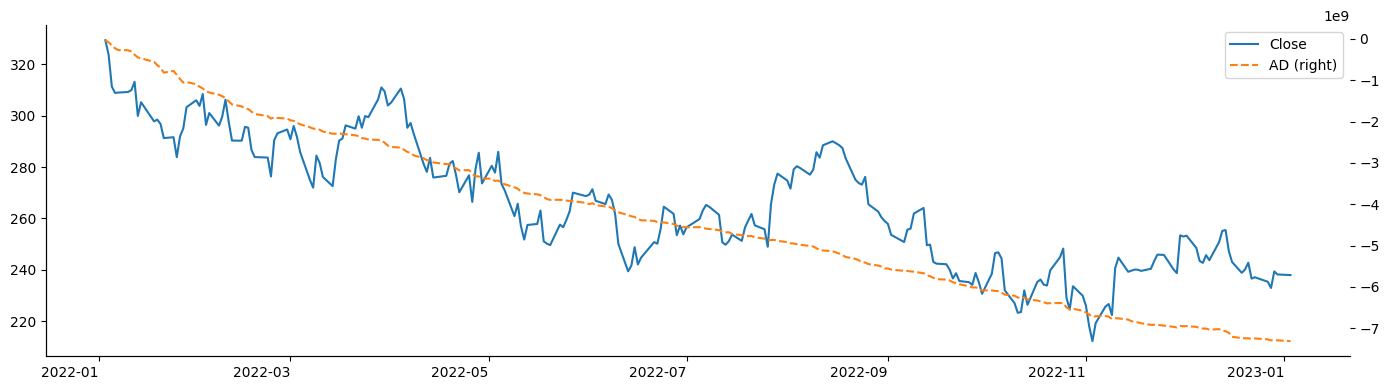

In [88]:
ax = cha[['Close', 'AD']].plot(figsize=(14, 4),
                              rot=0,
                              secondary_y='AD', style=['-', '--'])

ax.set_xlabel('')
sns.despine()
plt.tight_layout()